In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [46]:
theta_max = 90.0 # maximum angle of incline in degrees
m = 0.500 # mass of object in kg
g = 9.80 # acceleration of gravity in m/s^2

In [47]:
def get_acceleration(theta,mu):
    a = -g*np.sin(theta*np.pi/180.0)+mu*g*np.cos(theta*np.pi/180.0)
    return a

def get_friction(theta,mu):
    N = m*g*np.cos(theta*np.pi/180.0)
    f = mu*N
    return f

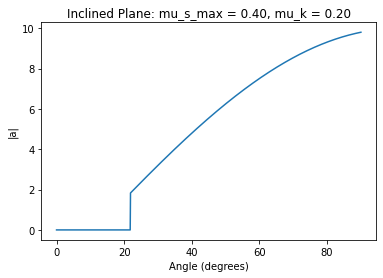

In [48]:
nsteps = 1001
mu_s_max = 0.40
mu_k = 0.20

a = np.zeros(nsteps)
mu = np.zeros(nsteps)
theta_step = np.zeros(nsteps)
f = np.zeros(nsteps)

for i in range(nsteps):
    theta_step[i] = i/(nsteps-1)*theta_max
    a_compare = get_acceleration(theta_step[i],mu_s_max)
    if a_compare > 0:
        a[i] = 0.0
        mu_theta = np.tan(theta_step[i]*np.pi/180.0)
        f[i] = get_friction(theta_step[i],mu_theta)
    else:
        a[i] = get_acceleration(theta_step[i],mu_k)
        f[i] = get_friction(theta_step[i],mu_k)
        
plt.plot(theta_step,abs(a))
plt.xlabel('Angle (degrees)')
plt.ylabel('|a|')
plt.title('Inclined Plane: mu_s_max = 0.40, mu_k = 0.20')
plt.show()

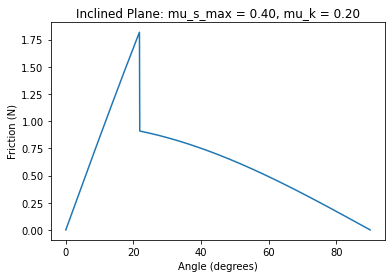

In [49]:
plt.plot(theta_step,f)
plt.xlabel('Angle (degrees)')
plt.ylabel('Friction (N)')
plt.title('Inclined Plane: mu_s_max = 0.40, mu_k = 0.20')
plt.show()